In [1]:
import os
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
from dotenv import load_dotenv

In [2]:
ACTIVITIES = ['sleep', 'eat', 'personal', 'work', 'leisure', 'other']
load_dotenv()
# base_path = os.environ.get("SSE24_PATH")
out_path = "output/"

In [3]:
# def plot_results(df, 'var', ax, legends[i], markers[i], colors[i]):
def plot_results(df, fill_metric, ax, _legend, _marker, _color, _linestyle='-', _markersize=6):
    array = df.to_numpy()
    
    mean = np.median(array, axis=1)
    x = np.arange(len(mean))
    ax.plot(x, mean, label=_legend, marker=_marker, color=_color, linestyle=_linestyle, markersize=_markersize)

    if fill_metric=='minmax':
        min = np.min(array, axis=1)
        max = np.max(array, axis=1)
        ax.fill_between(x, min, max, color=_color, alpha=0.1)
        
    elif fill_metric=='var':
        var = np.var(array, axis=1)
        ax.fill_between(x, mean-var*1, mean+var*1, color=_color, alpha=0.2)
    
    elif fill_metric=='std':
        std = np.std(array, axis=1)
        ax.fill_between(x, mean-std, mean+std, color=_color, alpha=0.2)

### single-linkage, cosine-sim, p=0

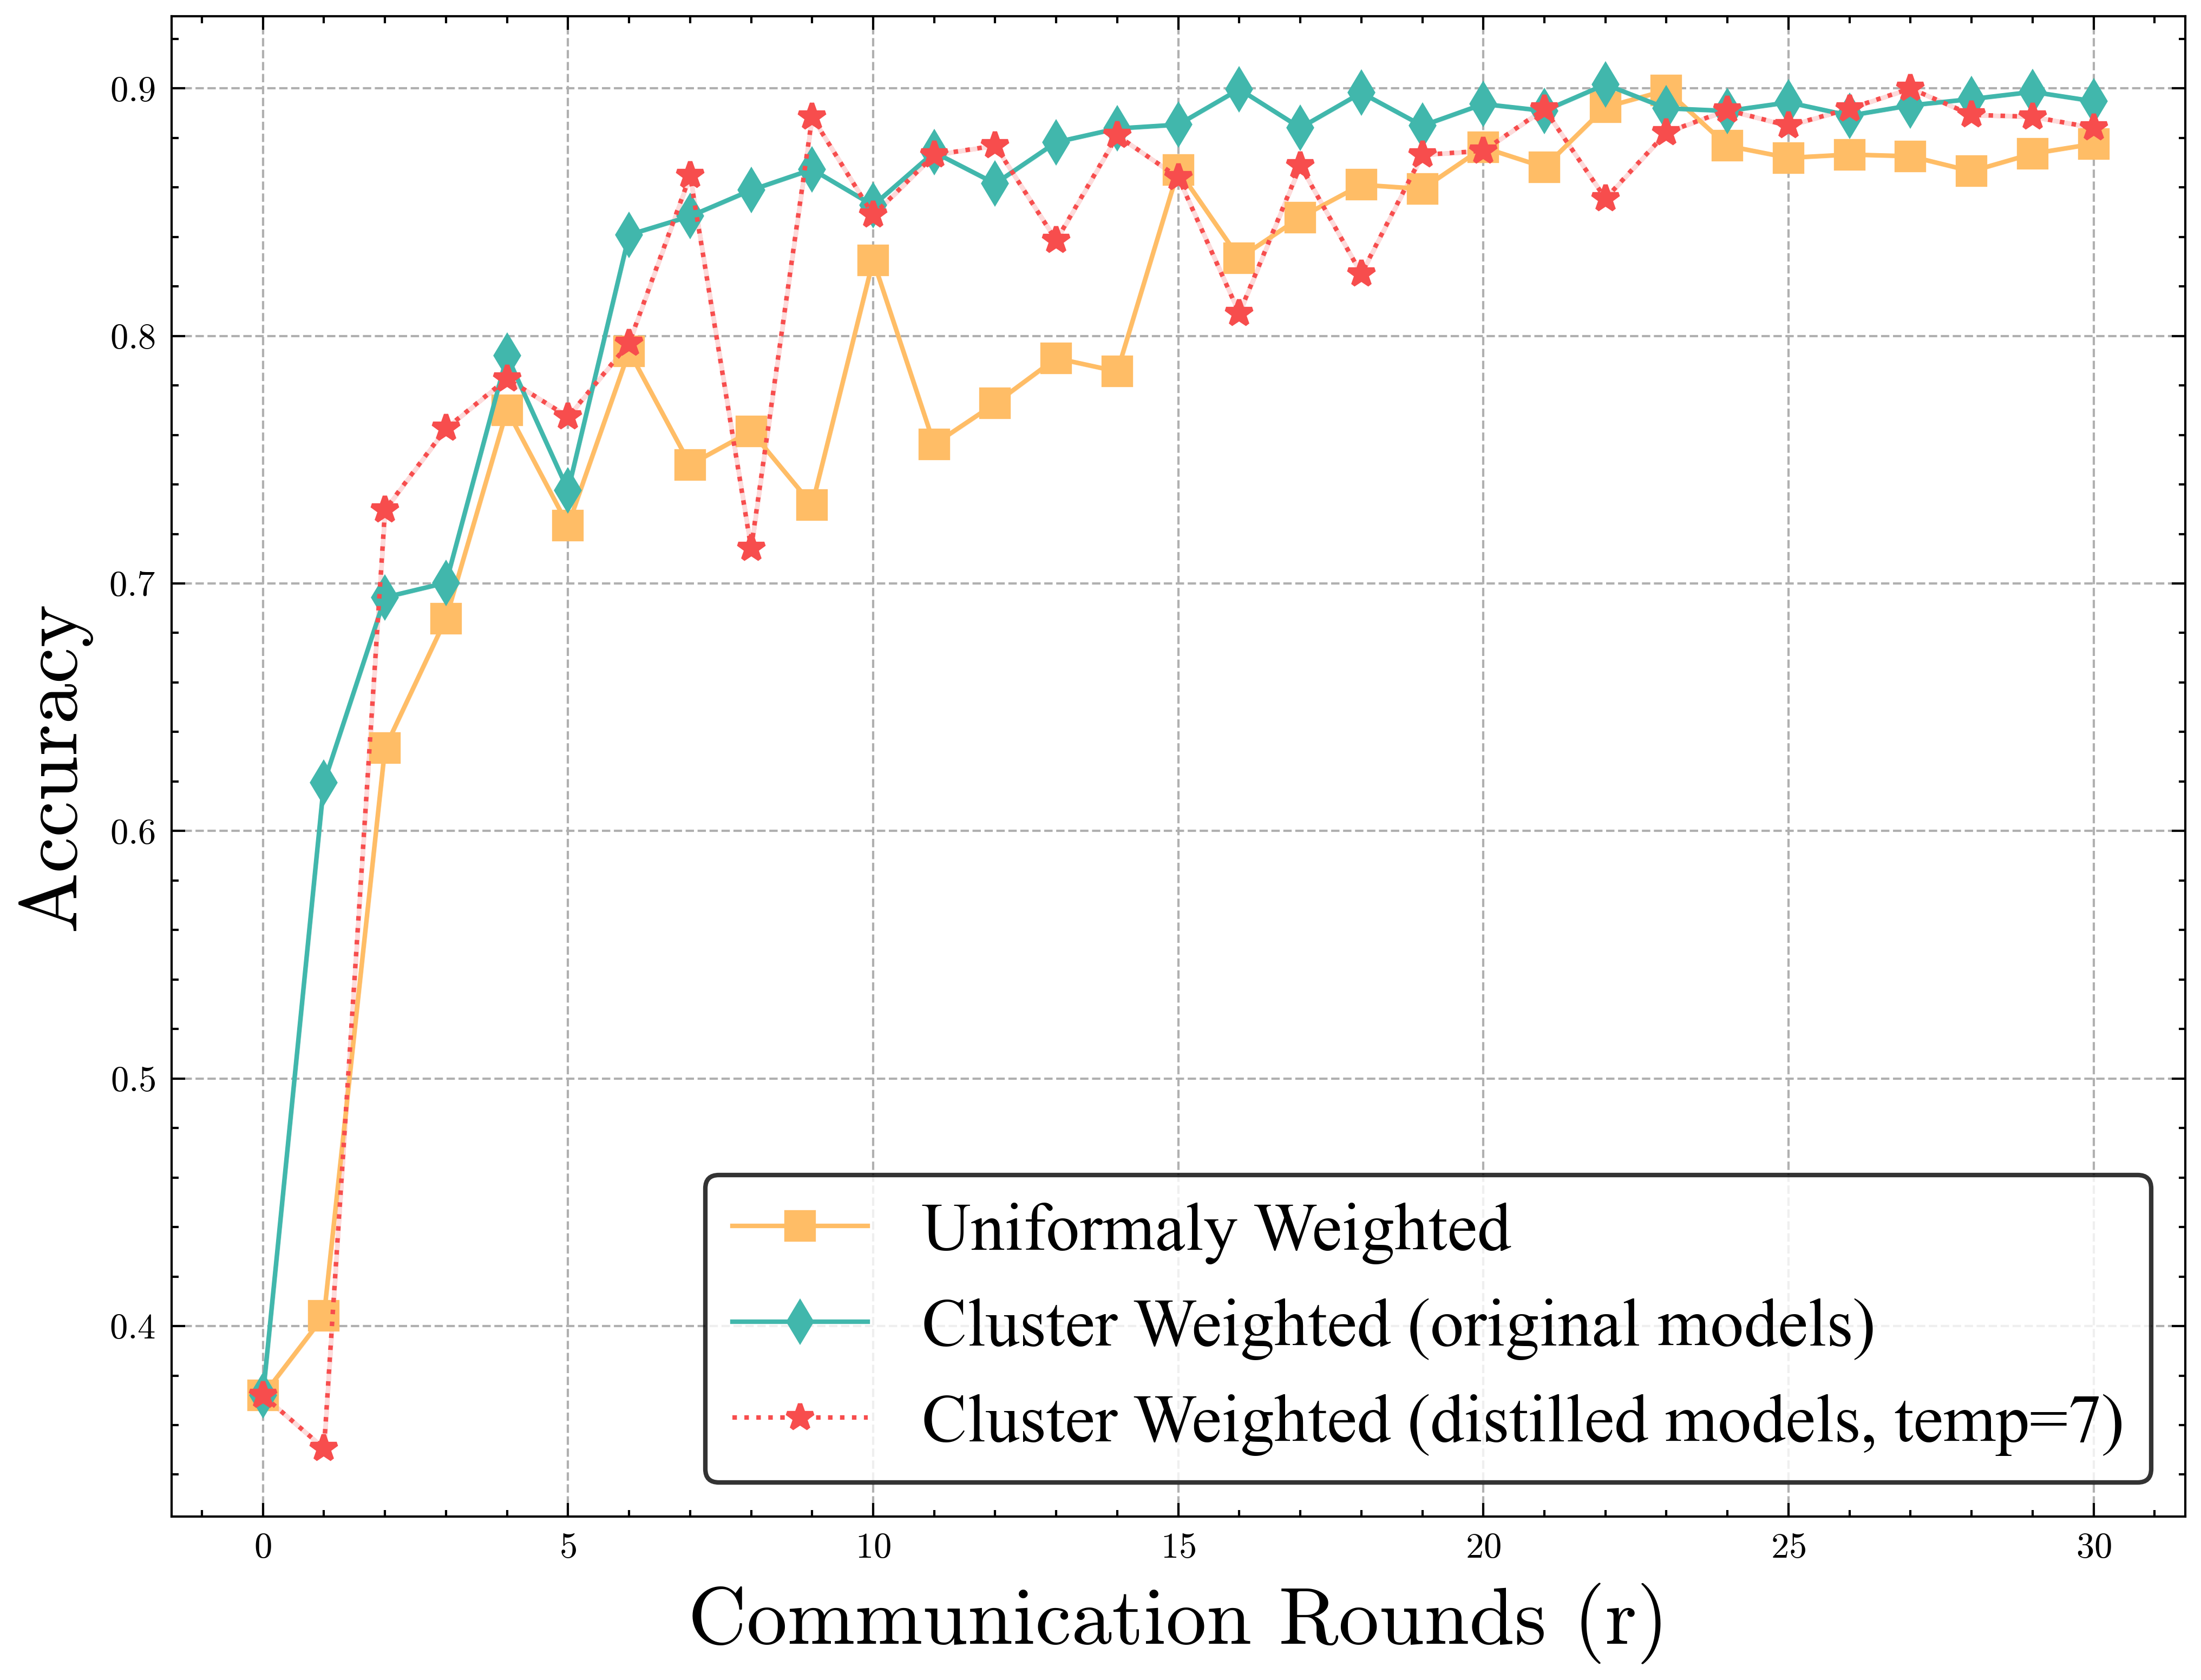

In [12]:
WINDOW_SIZE = 15
NUM_ITERATION = 1
NUM_CHUNKS = 30

lines = [
    {
        "file": "cos_single_0_stu_equal",
        "color": "#ffbd66",
        "marker": "s",
        "legend": "Uniformaly Weighted",
        "linestyle": "-",
        "markersize": 6
    }, 
    {
        "file": "cos_single_0_stu_cluster_other",
        "color": "#41b7ac",
        "marker": "d",
        "legend": "Cluster Weighted (original models)",
        "linestyle": "-",
        "markersize": 6
    }, 
    {
        "file": "cos_single_0_stu_temp_7",
        "color": "#f74d4d",
        "marker": "*",
        "legend": "Cluster Weighted (distilled models, temp=7)",
        "linestyle": "dotted",
        "markersize": 6
    },
    # {
    #     "file": "cos_single_0_stu_temp_5",
    #     "color": "#275c0c",
    #     "marker": "h",
    #     "legend": "distilled-temp-5",
    #     "linestyle": "dotted",
    #     "markersize": 6
    # },
    # {
    #     "file": "cos_single_0_stu_temp_7",
    #     "color": "#f74d4d",
    #     "marker": "o",
    #     "legend": "distilled-temp-7",
    #     "linestyle": "dotted",
    #     "markersize": 6
    # }, 
]

dfs = []
for line in lines:
    f = line["file"]
    dfs.append(pd.read_csv(out_path + f"T_{WINDOW_SIZE}/{NUM_ITERATION}_iter_{NUM_CHUNKS}_chunk/{f}.csv", index_col=0)) 

with plt.style.context(['science', 'ieee', 'no-latex']):
    fig, ax = plt.subplots(figsize=(8, 6))

    for i, df in enumerate(dfs):
        plot_results(df, 'var', ax, lines[i]["legend"], lines[i]["marker"], lines[i]["color"], lines[i]["linestyle"], lines[i]["markersize"])
        
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5)
    plt.xticks(np.arange(0, NUM_CHUNKS+1, 5))
    # plt.yticks(np.arange(0.4, 0.91, 0.1))
    plt.xlabel('Communication Rounds (r)', fontsize=18)
    plt.ylabel('Accuracy', fontsize=18)
    # plt.title(f'T-{WINDOW_SIZE}, {NUM_ITERATION}-iter, {NUM_CHUNKS}-chunk, single-linkage, 0%-draw', fontsize=15)
    # plt.title(f'T={WINDOW_SIZE}, with 0% local groundtruth', fontsize=18)
    plt.legend(loc='lower right', frameon=True, edgecolor='black', prop={'size': 15})
    plt.show()